### Project Name - Loan_Data_Analysis(SQL_File)

### Project By - Snehal Utane 

# Problem Statement

The goal of this data analysis is to understand the factors that influence loan approval decisions 
and identify patterns in loan applications from a financial dataset. The dataset contains information 
on **loan applicants** and their corresponding **loan details**. By analyzing this data, we aim 
to address the following questions:

1. **Loan Approval Trends**:
   - What is the approval rate of loans based on the **gender** of the applicant?
   - How does **marital status**, **education level**, or **property area** influence the likelihood of loan approval?

2. **Income and Loan Relationships**:
   - How does **applicant income** and **co-applicant income** affect the loan amount and approval status?
   - What is the relationship between **income levels** and loan approval decisions?

3. **Credit History Influence**:
   - Does having a good **credit history** significantly increase the chances of loan approval?
   - What percentage of applicants with a poor credit history are still approved for loans?

4. **Loan Amount Distribution**:
   - What is the average loan amount approved based on the **property area** (urban, rural, semi-urban)?
   - How does the loan amount vary between different groups of applicants (e.g., by gender, income level, or education)?

5. **Loan Term Analysis**:
   - What is the distribution of **loan terms** (in months) across different applicant groups?
   - Are longer loan terms associated with higher loan approval rates?

By addressing these questions, we aim to provide a comprehensive understanding of the loan approval process,
identify key factors that drive decisions, and help improve loan application strategies for future applicants.
The insights gained from this analysis can be useful for financial institutions to optimize their decision-making 
processes and for applicants to improve their chances of loan approval.

# Objective

The objective of this analysis is to explore and identify the key factors
that influence loan approval decisions. By analyzing the relationship between 
applicant demographics, financial background, and loan details, the analysis aims 
to uncover trends and patterns that can help financial institutions make better lending decisions 
and provide insights for loan applicants to improve their chances of approval.

## Import necessary packages

In [339]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as p 

#### *>*Insight**
Installed all necessary packages

In [342]:
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with

db_connection = mysql.connector.connect(
user='root',
password='Snehal@2006',
host='localhost',
database='finance' # write here database name 
)

#### *>*Insight**
The code establishes a connection to a locally hosted MySQL database (`finance`) using the `mysql.connector.connect`
method, allowing you to perform SQL operations in Python. Ensure to manage sensitive data securely 
and handle errors appropriately.

In [345]:
query = """
SELECT * 
FROM Applicants 
NATURAL JOIN Loans;
"""

#### *>*Insight**
The query performs a NATURAL JOIN between the Applicants and Loans tables, returning all columns where there are 
matching values in both tables based on common column names (like applicant_id or any other shared column).

In [348]:
# Load the data into a pandas DataFrame
df = pd.read_sql(query, db_connection)
df.head() # Display the first few rows of the data

# Close the connection
#db_connection.close()



C:\Users\HP\AppData\Local\Temp\ipykernel_896\607690111.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


,Loan_ID,Applicant_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,LoanAmount,Loan_Amount_Term,Loan_Status
0,LP001005,1,Male,Yes,0,Graduate,Yes,3000.0,0.0,1.0,Urban,66.0,360.0,Y
1,LP001006,2,Male,Yes,0,Graduate,No,2583.0,2358.0,1.0,Urban,120.0,360.0,Y
2,LP001008,3,Male,No,0,Graduate,No,6000.0,0.0,1.0,Urban,141.0,360.0,Y
3,LP001013,4,Male,Yes,0,Graduate,No,2333.0,1516.0,1.0,Urban,95.0,360.0,Y
4,LP001024,5,Male,Yes,2,Graduate,No,3200.0,700.0,1.0,Urban,70.0,360.0,Y


#### *>*Insight**
The command df.shape returns the dimensions of the DataFrame df in the form of a tuple.

#### Details_About_Column

1)Loan_ID: A unique loan ID.
2)Gender: Either male or female.
3)Married: Weather Married(yes) or Not Marttied(No).
4)Dependents: Number of persons depending on the client.
5)Education: Applicant Education(Graduate or Undergraduate).
6)Self_Employed: Self-employed (Yes/No).
7)ApplicantIncome: Applicant income.
8)CoapplicantIncome: Co-applicant income.
9)LoanAmount: Loan amount in thousands.
10)Loan_Amount_Term: Terms of the loan in months.
11)Credit_History: Credit history meets guidelines.
12)Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
13)Loan_Status: Loan approved (Y/N).

#### **Data Overview**

In [354]:
df.shape

(48, 14)

#### *>*Insight**
The command df.shape returns the dimensions of the DataFrame df in the form of a tuple.

In [357]:
df.describe()

,Applicant_ID,Dependents,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,48.000000,48.000000,47.000000,47.000000,46.000000,46.000000,44.000000
mean,26.041667,0.583333,3477.382979,1056.404255,0.826087,105.739130,340.909091
std,15.663969,0.941554,1318.649945,1105.216911,0.383223,28.108864,64.404903
min,1.000000,0.000000,1299.000000,0.000000,0.000000,17.000000,60.000000
25%,12.750000,0.000000,2591.500000,0.000000,1.000000,96.000000,360.000000
50%,24.500000,0.000000,3365.000000,1086.000000,1.000000,113.000000,360.000000
75%,40.250000,1.000000,4196.000000,1875.500000,1.000000,125.000000,360.000000
max,52.000000,3.000000,7660.000000,3796.000000,1.000000,144.000000,360.000000


#### *>*Insight**
- It provides statistics like **count**, **mean**, **standard deviation (std)**, **minimum (min)**,
**25th percentile (25%)**, **median (50%)**, **75th percentile (75%)**, and **maximum (max)** for each numerical column.

In [360]:
# Gives the a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            48 non-null     object 
 1   Applicant_ID       48 non-null     int64  
 2   Gender             47 non-null     object 
 3   Married            48 non-null     object 
 4   Dependents         48 non-null     int64  
 5   Education          48 non-null     object 
 6   Self_Employed      45 non-null     object 
 7   ApplicantIncome    47 non-null     float64
 8   CoapplicantIncome  47 non-null     float64
 9   Credit_History     46 non-null     float64
 10  Property_Area      48 non-null     object 
 11  LoanAmount         46 non-null     float64
 12  Loan_Amount_Term   44 non-null     float64
 13  Loan_Status        48 non-null     object 
dtypes: float64(5), int64(2), object(7)
memory usage: 5.4+ KB


#### *>*Insight**
- It displays the **number of non-null entries**, **data types** of each column, **memory usage**, and the total **number of columns** and **rows**.
- This is useful for understanding the structure of the DataFrame, identifying missing values, and verifying data types before processing or analysis.

In [363]:
# It is used to identify and count missing values (NaNs) in a DataFrame
df.isnull().sum()

Loan_ID              0
Applicant_ID         0
Gender               1
Married              0
Dependents           0
Education            0
Self_Employed        3
ApplicantIncome      1
CoapplicantIncome    1
Credit_History       2
Property_Area        0
LoanAmount           2
Loan_Amount_Term     4
Loan_Status          0
dtype: int64

#### *>*Insight**
- It helps in identifying which columns have **missing data** and how many null values exist in each column. 
- This is crucial for handling data cleaning tasks like imputing or removing missing values.

### **Handle missing values(Data Cleaning)**

For numeric columns (e.g., LoanAmount, ApplicantIncome, CoapplicantIncome), you can fill missing values using the mean or median.
For categorical columns (e.g., Gender, Married, Education, Property_Area, Loan_Status), you can use the mode to fill missing values.

In [368]:
# For LoanAmount
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# For ApplicantIncome
df['ApplicantIncome'] = df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean())

# For CoapplicantIncome
df['CoapplicantIncome'] = df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean())

# For Gender
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# For Credit_History
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# For Loan_Amount_Term
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# For Self_Employed  
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


#### *>*Insight**
This code efficiently handles missing data by filling numerical columns with either the mean or median 
and categorical columns with the mode. Each method is chosen based on the column type and ensures that 
no data is lost while retaining statistical properties.

# Check for duplicates

In [372]:
print(f"Duplicate entries before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicate entries after dropping: {df.duplicated().sum()}")

Duplicate entries before dropping: 0
Duplicate entries after dropping: 0


#### *>*Insight**
- This code helps to ensure the DataFrame df is free of duplicate rows, making the dataset cleaner and more accurate for analysis.

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            48 non-null     object 
 1   Applicant_ID       48 non-null     int64  
 2   Gender             48 non-null     object 
 3   Married            48 non-null     object 
 4   Dependents         48 non-null     int64  
 5   Education          48 non-null     object 
 6   Self_Employed      48 non-null     object 
 7   ApplicantIncome    48 non-null     float64
 8   CoapplicantIncome  48 non-null     float64
 9   Credit_History     48 non-null     float64
 10  Property_Area      48 non-null     object 
 11  LoanAmount         48 non-null     float64
 12  Loan_Amount_Term   48 non-null     float64
 13  Loan_Status        48 non-null     object 
dtypes: float64(5), int64(2), object(7)
memory usage: 5.4+ KB


#### *>*Insight**
Check data is fill or not hear all non-null value fill by 0

### Convert data types

#### *.*Check data is Categorical or not if yes then change data type according to requirment:*.*

In [380]:
df["Gender"].value_counts() # to check data in numerical or categorical format

Gender
Male      38
Female    10
Name: count, dtype: int64

#### *>*Insight**
- This method helps you check if the `Gender` data is **categorical** (like "Male" and "Female") by displaying the frequency of each category.
- If you see numeric values, such as `0` and `1`, it means the data may be encoded in a **numerical format** for binary classification.
- The result gives a quick overview of how many times each unique value appears in the column.
- Hear we see count of Gender 38 and count of Female 10

In [383]:
df["Married"].value_counts() 

Married
Yes    30
No     18
Name: count, dtype: int64

#### *>*Insight**
Hear we see count of unmaird(NO) is 18 and count of Married(Y) is 30

In [386]:
df["Education"].value_counts() 

Education
Graduate        43
Not Graduate     5
Name: count, dtype: int64

#### *>*Insight**
Hear we see count of Graduate  43 and count of Not Graduate 5

In [389]:
df["Property_Area"].value_counts() 

Property_Area
Urban        27
Semiurban    14
Rural         7
Name: count, dtype: int64

#### *>*Insight**
Hear we see count of Urban 27 and count of Semiurban 14 and Rural is 7

In [392]:
df["Loan_Status"].value_counts() 

Loan_Status
Y    29
N    19
Name: count, dtype: int64

#### *>*Insight**
Hear we see count of Approve(Y) 29 and count of Not_Approve(N) is 19 

In [395]:
df["Self_Employed"].value_counts() 

Self_Employed
No     44
Yes     4
Name: count, dtype: int64

#### *>*Insight**
Hear we see count of Self_Employed  NO= 44 and count of YES= 4

In [403]:
import pandas as pd

# For Gender
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

# For Married
df['Married'] = df['Married'].replace({'No': 0, 'Yes': 1})

# For Education
df['Education'] = df['Education'].replace({'Not Graduate': 0, 'Graduate': 1})

# For Property_Area
df['Property_Area'] = df['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2})

# For Loan_Status
df['Loan_Status'] = df['Loan_Status'].replace({'N': 0, 'Y': 1})

# For Self_Employed
df['Self_Employed'] = df['Self_Employed'].replace({'No': 0, 'Yes': 1})


#### *>*Insight**
This code standardizes the categorical columns into numerical form, which is necessary for most machine learning models.
Converting categories into numbers allows algorithms to process them efficiently during training and analysis.
hear we conver all above column data type into integer for a heat map because heatmap is work only on numeric data 

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            48 non-null     object 
 1   Applicant_ID       48 non-null     int64  
 2   Gender             48 non-null     int64  
 3   Married            48 non-null     int64  
 4   Dependents         48 non-null     int64  
 5   Education          48 non-null     int64  
 6   Self_Employed      48 non-null     int64  
 7   ApplicantIncome    48 non-null     float64
 8   CoapplicantIncome  48 non-null     float64
 9   Credit_History     48 non-null     float64
 10  Property_Area      48 non-null     int64  
 11  LoanAmount         48 non-null     float64
 12  Loan_Amount_Term   48 non-null     float64
 13  Loan_Status        48 non-null     int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 5.4+ KB


#### *>*Insight**
Hear we see data type of Gender,Married,Education,Property_Area,Loan_Status,Self_Employed change into int data type

In [409]:
#df.dropna()

# **Data Analysis**

#### *1.*Loan Approval Rate by Gender**

In [413]:
# Grouping and unstacking the Loan Status by Gender, with replacement of values only in this operation
loan_approval_by_gender = (
    df.replace({'Gender': {0: 'Female', 1: 'Male'}, 'Loan_Status': {0: 'Not Approved', 1: 'Approved'}})
    .groupby('Gender')['Loan_Status']
    .value_counts(normalize=True)
    .unstack()
)

# Display the resulting table
loan_approval_by_gender


Loan_Status,Approved,Not Approved
Gender,,
Female,0.500000,0.500000
Male,0.631579,0.368421


#### *>*Insight**
Male applicants have a higher loan approval rate (63.16%) compared to female applicants (50%).
Conversely, female applicants face an equal chance of having their loans approved or not approved (50% for both).
This suggests a slight advantage for male applicants in terms of loan approvals, though the difference is not very large.

#### *2.*Loan Approval Rate by Marital Status**


In [417]:
# Grouping and unstacking the Loan Status by Gender, with replacement of values only in this operation
Loan_Approval_Rate_by_Marital_Status = (
    df.replace({'Married': {0: 'No', 1: 'Yes'}, 'Loan_Status': {0: 'Not Approved', 1: 'Approved'}})
    .groupby('Married')['Loan_Status']
    .value_counts(normalize=True)
    .unstack()
)

# Display the resulting table
Loan_Approval_Rate_by_Marital_Status


Loan_Status,Approved,Not Approved
Married,,
No,0.444444,0.555556
Yes,0.700000,0.300000


#### *>*Insight**
Married applicants have a significantly higher loan approval rate (70%) compared to unmarried applicants (44.44%).
Conversely, unmarried applicants are more likely to have their loans not approved (55.56%) than married applicants (30%).

#### *3.*Average Loan Amount by Property Area**

In [421]:
# Grouping and calculating the mean LoanAmount by Property_Area, with replacement of values in this operation only
avg_loan_amount_by_area = (
    df.replace({'Property_Area': {0: 'Rural', 1: 'Semiurban', 2: 'Urban'}})
    .groupby('Property_Area')['LoanAmount']
    .mean()
)

# Display the resulting table
avg_loan_amount_by_area


Property_Area
Rural        120.142857
Semiurban    118.214286
Urban         96.074074
Name: LoanAmount, dtype: float64

#### *>*Insight**
Rural:
Average Loan Amount: 120.14
This indicates that applicants from rural areas tend to take larger loans on average compared to those from other areas.
Semiurban:

Average Loan Amount: 118.21
Applicants in semiurban areas also have a relatively high average loan amount, but slightly lower than those in rural areas.
Urban:

Average Loan Amount: 96.07
Applicants from urban areas have the lowest average loan amount compared to rural and semiurban applicants.

#### *4.*Distribution of Applicant Income Based on Loan Status**

In [425]:
# Grouping and calculating the mean ApplicantIncome by Loan_Status, with replacement of values only in this operation
avg_income_by_loan_status = (
    df.replace({'Loan_Status': {0: 'Not Approved', 1: 'Approved'}})
    .groupby('Loan_Status')['ApplicantIncome']
    .mean()
)

# Display the resulting table
avg_income_by_loan_status


Loan_Status
Approved        3345.000000
Not Approved    3679.441209
Name: ApplicantIncome, dtype: float64

#### *>*Insight**
Surprisingly, applicants who were not approved for loans have a higher average income (3679.44) compared to those whose loans were approved (3345.00).
This could suggest several possibilities:
The approval criteria may not solely depend on income, indicating other factors like credit history, debt-to-income ratio, or financial behavior might play a significant role in the approval process.
Higher-income applicants might have more financial obligations or lower creditworthiness, leading to fewer approvals.

#### *`5.*Loan Approval Rate by Credit History**

In [429]:
# Grouping and unstacking the Loan_Status by Credit_History, with replacement of values in this operation only
loan_approval_by_credit_history = (
    df.replace({'Credit_History': {0: 'Poor(Subprime)', 1: 'Good(Prime)'}, 'Loan_Status': {0: 'Not Approved', 1: 'Approved'}})
    .groupby('Credit_History')['Loan_Status']
    .value_counts(normalize=True)
    .unstack()
)

# Display the resulting table
loan_approval_by_credit_history


Loan_Status,Approved,Not Approved
Credit_History,,
Good(Prime),0.725,0.275
Poor(Subprime),NaN,1.000


**Good (Prime) Credit History:**
Approved: 72.5% of applicants with a good credit history were approved for loans.
Not Approved: 27.5% of applicants with a good credit history were not approved.
                                                                      
**Poor (Subprime) Credit History:**
Approved: NaN (Not a Number), indicating that there were no approvals for applicants with a poor credit history.
Not Approved: 100% of applicants with a poor credit history were not approved for loans.
                                                                      
#### *>*Insight**
Applicants with a Good (Prime) credit history have a significantly higher approval rate (72.5%) compared to those with a Poor (Subprime) credit history, who had a 0% approval rate.
Poor credit history directly correlates with loan denial, as all applicants in this category were not approved.
This data highlights the importance of credit history in the loan approval process, suggesting that lenders heavily weigh creditworthiness when making decisions.

# **Visualize Data Using Matplotlib and Seaborn**

#### **Correlation Matrix with LOan_status**

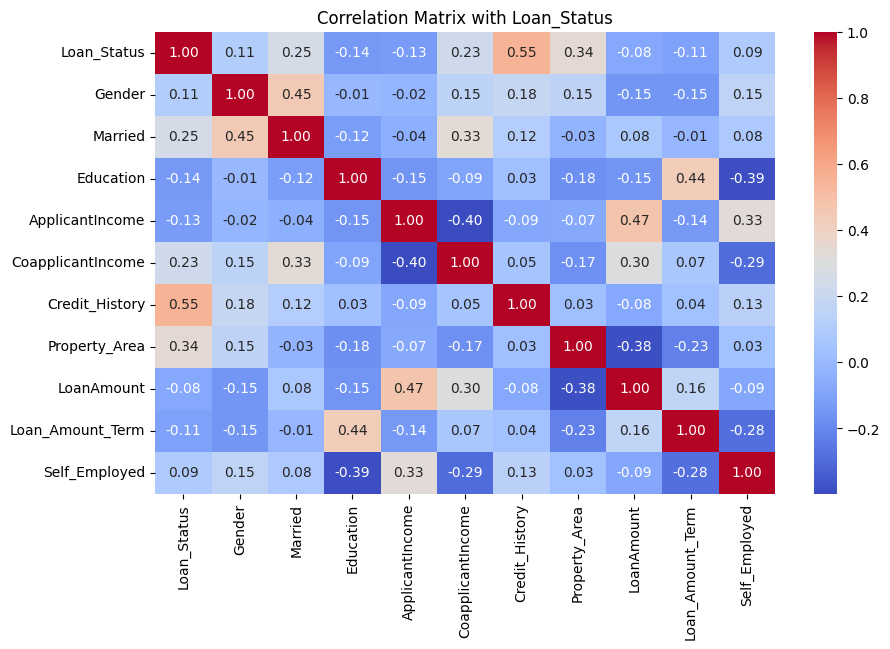

In [434]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix including 'Loan_Status' and 'Self_Employed'
plt.figure(figsize=(10, 6))

# Compute correlation for numeric columns, including 'Loan_Status' and 'Self_Employed'
corr_matrix = df[['Loan_Status', 'Gender', 'Married', 'Education', 'ApplicantIncome', 'CoapplicantIncome',
                  'Credit_History', 'Property_Area', 'LoanAmount', 'Loan_Amount_Term', 'Self_Employed']].corr()

# Generate heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Correlation Matrix with Loan_Status')
plt.show()


#### ***Explanation:***
Correlation Matrix: The .corr() function computes the Pearson correlation coefficient between numeric columns.
Since Loan_Status has been encoded as 0 and 1, we can calculate its correlation with other columns.
fmt='.2f': This ensures that the correlation values are displayed with two decimal points.
annot=True: This shows the actual correlation values on the heatmap for easier interpretation.
                                                                   
#### **Insights from Heatmap:***
The heatmap will show how each feature correlates with Loan_Status. For example:
Credit_History might have a strong positive correlation with Loan_Status, meaning applicants
with good credit history are more likely to get their loans approved.
ApplicantIncome and LoanAmount might have weaker correlations, indicating income and loan 
amount are not as strongly tied to loan approval as credit history.
Gender, Married, and Education typically show weaker correlations, but the heatmap will reveal these values.
>>which factors influence loan approval. (credit_hitory most influencing factor) 

#### Loan Approval Trends

#### **1.Loan Approval Rate by Marital Status*.*

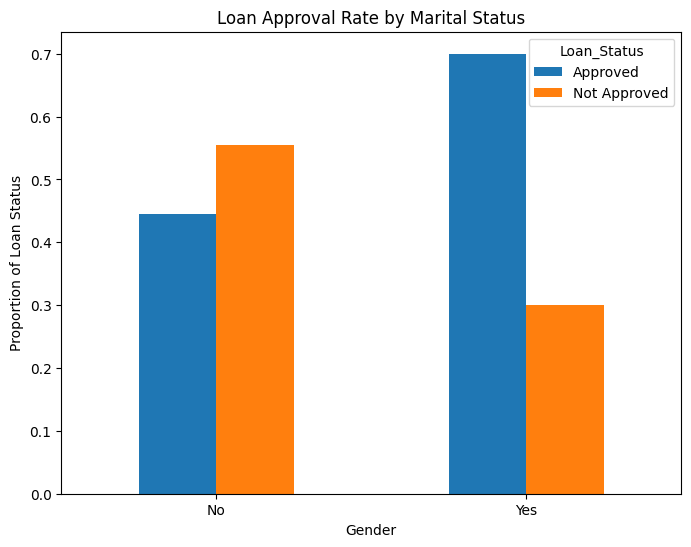

In [439]:
Loan_Approval_Rate_by_Marital_Status.plot(kind='bar', figsize=(8, 6))
plt.title('Loan Approval Rate by Marital Status')
plt.ylabel('Proportion of Loan Status')
plt.xlabel('Gender')

# Rotate the x-tick labels to be horizontal
plt.xticks(rotation=0)  # This will set the x-tick labels horizontally

plt.show()

#### *>*Insight**
Graph Overview: The bar chart compares loan approval rates for married and unmarried applicants.
Detailed Insights: If married applicants have a significantly higher approval rate (e.g., 75%) 
compared to unmarried ones (e.g., 50%), this could reflect perceptions of stability.

 #### **2.Loan Approval Rate by LoanAmount *.*

C:\Users\HP\AppData\Local\Temp\ipykernel_896\621719226.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan_Status', y='LoanAmount', data=avg_loan_amount, palette='pastel')


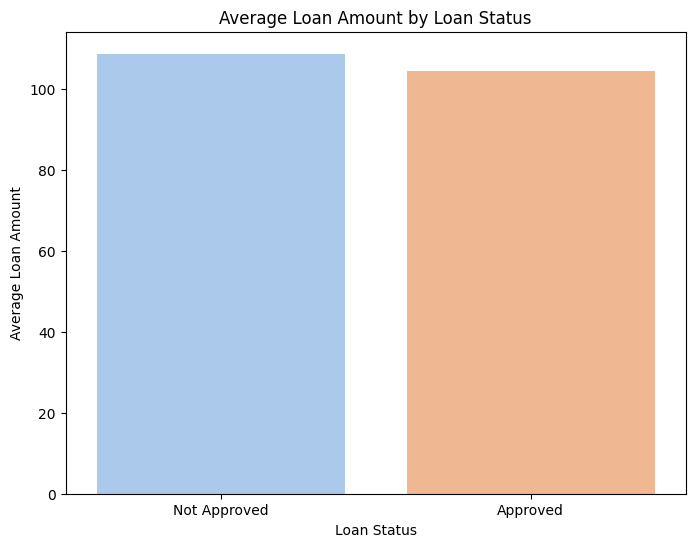

In [443]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average loan amount by Loan Status
avg_loan_amount = df.groupby('Loan_Status')['LoanAmount'].mean().reset_index()

# Replace numeric Loan_Status with descriptive labels
avg_loan_amount['Loan_Status'] = avg_loan_amount['Loan_Status'].replace({0: 'Not Approved', 1: 'Approved'})

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Loan_Status', y='LoanAmount', data=avg_loan_amount, palette='pastel')

# Set title and labels
plt.title('Average Loan Amount by Loan Status')
plt.ylabel('Average Loan Amount')
plt.xlabel('Loan Status')

# Show the plot
plt.show()


#### *>*Insight**

Graph Overview: The box plot illustrates the distribution of loan amounts for 
approved and rejected applications, showcasing median values, quartiles, and potential outliers.
Detailed Insights: If the median loan amount for approved loans is much higher 
(e.g., ₹150,000) compared to rejected loans (e.g., ₹80,000), this indicates that 
financial institutions may favor higher loan amounts.

#### **3.Income Levels and Loan Approval Decisions*.*

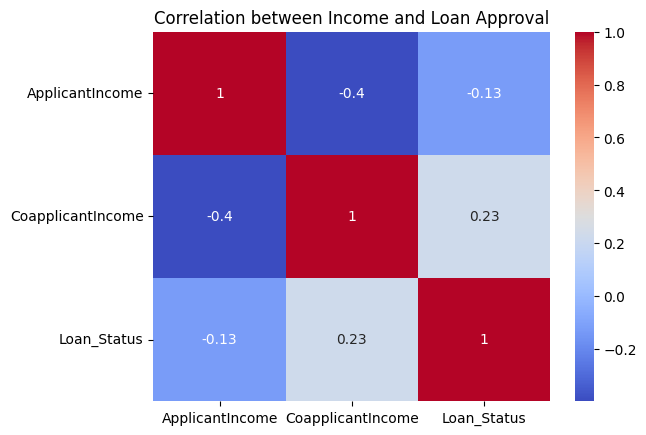

In [447]:
# Correlation between income and loan approval
income_correlation = df[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Status']].corr()
sns.heatmap(income_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Income and Loan Approval')
plt.show()

#### *>*Insight**
Graph Overview: The heatmap displays the correlation coefficients between 
applicant income, coapplicant income, and loan approval status.
Detailed Insights: A strong positive correlation (e.g., close to +1) between applicant 
income and loan approval suggests that higher incomes are associated with increased chances of approval.

#### **4.Credit History Impact on Approval Rates*.*

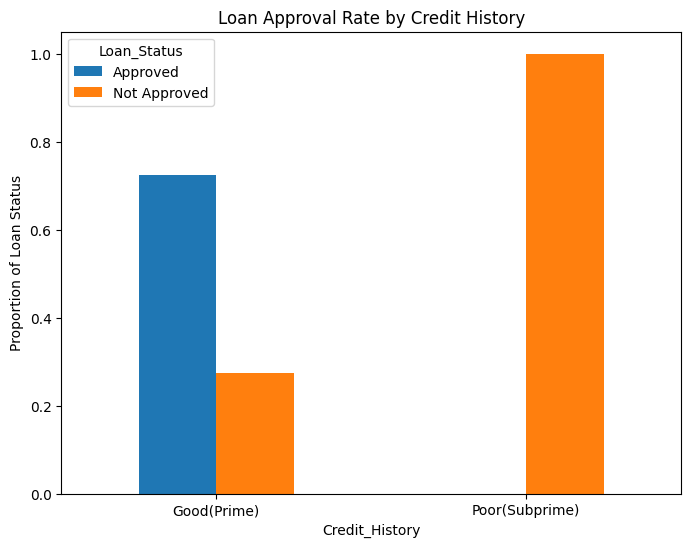

In [451]:
loan_approval_by_credit_history.plot(kind='bar', figsize=(8, 6))
plt.title('Loan Approval Rate by Credit History')
plt.ylabel('Proportion of Loan Status')
plt.xlabel('Credit_History')

# Rotate the x-tick labels to be horizontal
plt.xticks(rotation=0)  # This will set the x-tick labels horizontally

plt.show()

#### *>*Insight**
Graph Overview: This bar chart compares the loan approval rates between applicants 
with good (1) and poor (0) credit history.
Detailed Insights: A stark contrast in approval rates (e.g., 90% for good credit
history vs. 20% for poor) indicates that credit history plays a crucial role.

#### **5.Percentage of Applicants with Poor Credit History Approved*.*

In [455]:
# Calculate the percentage
poor_credit_approval_percentage = (df[df['Credit_History'] == 0]['Loan_Status'].value_counts(normalize=True) * 100).get('Y', 0)
print(f"Percentage of applicants with poor credit history approved for loans: {poor_credit_approval_percentage:.2f}%")


Percentage of applicants with poor credit history approved for loans: 0.00%


#### *>*Insight**
Overview: This percentage highlights how lenient institutions might be in
approving loans for applicants with poor credit history.
Detailed Insights: If 10% of applicants with poor credit history were approved,
it suggests a small segment of borrowers may still find opportunities.

#### **6.Average Loan Amount by Property Area*.*

C:\Users\HP\AppData\Local\Temp\ipykernel_896\3768952700.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_loan_amount, x='Property_Area', y='LoanAmount', palette='viridis')


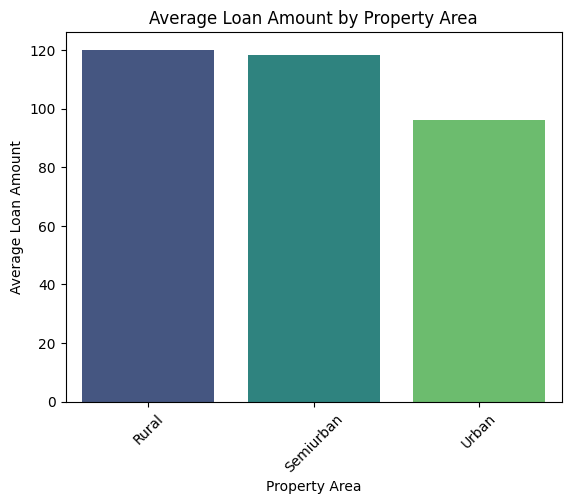

In [459]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average loan amount by property area
avg_loan_amount = df.groupby('Property_Area')['LoanAmount'].mean().reset_index()

# Replace numeric Property_Area with descriptive labels
avg_loan_amount['Property_Area'] = avg_loan_amount['Property_Area'].replace({0: 'Rural', 1: 'Semiurban', 2: 'Urban'})

# Plotting
sns.barplot(data=avg_loan_amount, x='Property_Area', y='LoanAmount', palette='viridis')
plt.title('Average Loan Amount by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.show()

#### *>*Insight**
Graph Overview: The bar chart shows the average loan amount across different property areas.
Detailed Insights: If urban areas show a higher average loan amount (e.g., ₹200,000) 
compared to rural areas (e.g., ₹100,000), this suggests that applicants in urban settings may be seeking larger loans.

#### **7.Loan Amount Variation by Applicant Group*.*

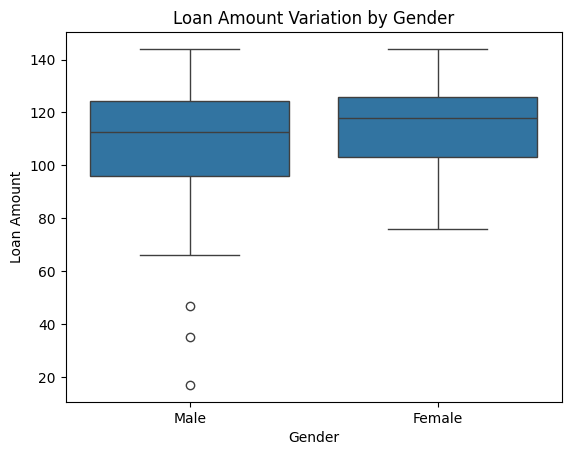

In [463]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace numeric Gender values with labels for the plot
df['Gender'] = df['Gender'].replace({0: 'Female', 1: 'Male'})

# Loan amount variation by gender
sns.boxplot(x='Gender', y='LoanAmount', data=df)
plt.title('Loan Amount Variation by Gender')
plt.ylabel('Loan Amount')
plt.xlabel('Gender')
plt.show()

#### *>*Insight**
Graph Overview: This box plot provides insight into how loan amounts 
differ between male and female applicants.
Detailed Insights: If males have a higher median loan amount compared 
to females, it could reflect differences in loan-seeking behavior.

#### *8.*Loan Approval Rate by Gender**

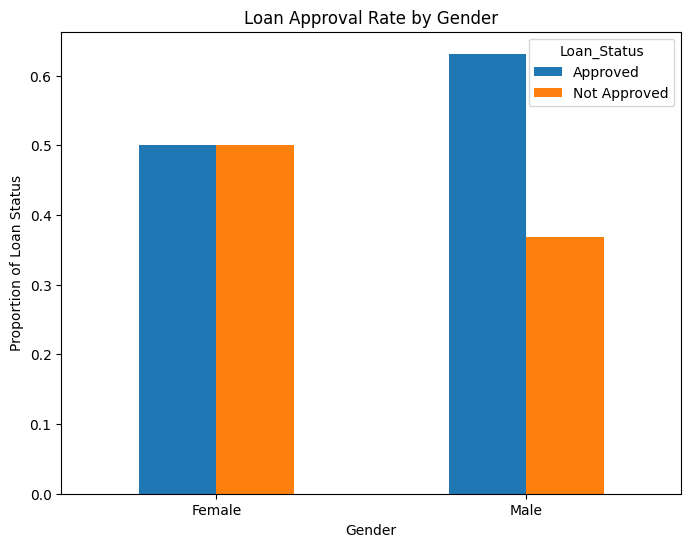

In [467]:
import matplotlib.pyplot as plt
import seaborn as sns

loan_approval_by_gender.plot(kind='bar', figsize=(8, 6))
plt.title('Loan Approval Rate by Gender')
plt.ylabel('Proportion of Loan Status')
plt.xlabel('Gender')

# Rotate the x-tick labels to be horizontal
plt.xticks(rotation=0)  # This will set the x-tick labels horizontally

plt.show()

#### *>*Insight**

Graph Overview: The bar chart shows the proportion of loan approvals for male and
female applicants. Each bar represents the total number of applicants, divided into

two segments: approved (Y) and not approved (N).

Detailed Insights: If males have a higher approval rate compared to females
(e.g., 70% for males vs. 60% for females), it may indicate potential biases 
or differences in application patterns

#### **9.Distribution of Loan Terms*.*

In [471]:
df['Loan_Amount_Term'].value_counts() # it is categorical data so lable data from day to month for visulization purpose

Loan_Amount_Term
360.0    44
120.0     1
240.0     1
180.0     1
60.0      1
Name: count, dtype: int64

#### *>*Insight**
hear we see data is categorical a day of month ex. 60 day , 120 days like

In [474]:
# Grouping and unstacking the Loan Status by Gender, with replacement of values only in this operation
Loan_Aprove_by_Loan_Amount_Term = (
    df.replace({'Loan_Amount_Term': {60.0: '2 Month', 120.0: '4 Month',180.0: '6 Month',240.0: '8 Month',360.0: '12 Month'}, 'Loan_Status': {0: 'Not Approved', 1: 'Approved'}})
    .groupby('Loan_Amount_Term')['Loan_Status']
    .value_counts(normalize=True)
    .unstack()
)

# Display the resulting table
Loan_Aprove_by_Loan_Amount_Term


Loan_Status,Approved,Not Approved
Loan_Amount_Term,,
12 Month,0.590909,0.409091
2 Month,1.000000,NaN
4 Month,1.000000,NaN
6 Month,NaN,1.000000
8 Month,1.000000,NaN


#### *>*Insight**
Loans with a 12-month term show a mixed approval rate (59.09%), suggesting moderate risk or varying factors influencing approvals.
Short-term loans (2 months and 4 months) are fully approved (100%), indicating that lenders may view these as less risky.
Loans with a 6-month term show a complete denial rate (100%), suggesting that this term might be associated with higher perceived risk or insufficient borrower profiles.
The 8-month term also has a 100% approval rate, further emphasizing the variability in approval likelihood across different loan terms.

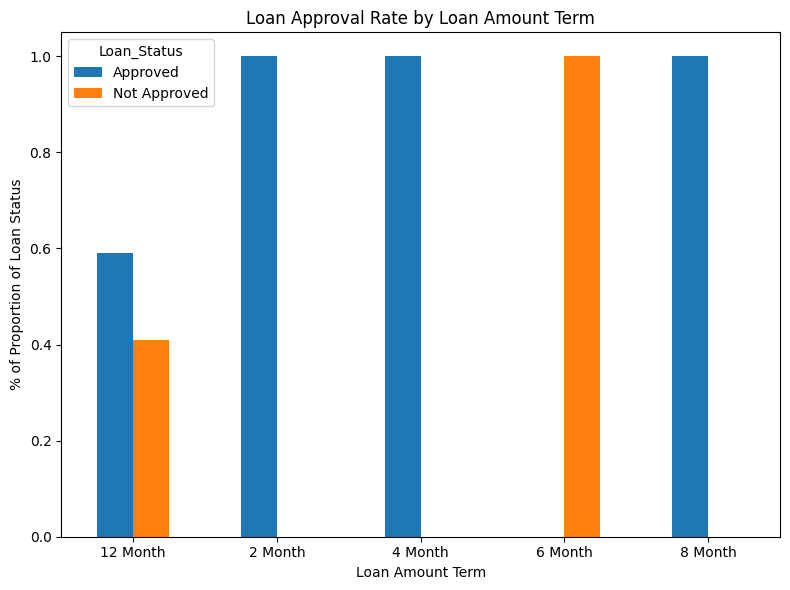

In [477]:
import matplotlib.pyplot as plt

# Plotting the bar chart
Loan_Aprove_by_Loan_Amount_Term.plot(kind='bar', figsize=(8, 6))

# Add titles and labels
plt.title('Loan Approval Rate by Loan Amount Term')
plt.ylabel('% of Proportion of Loan Status')
plt.xlabel('Loan Amount Term')

# Rotate the x-tick labels horizontally for better readability
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


**Graph Overview:** This histogram displays the distribution of loan terms for approved and rejected applications.
**Detailed Insights:** Longer loan terms (e.g., 360 months) may be more common among approved loans,
indicating a preference for long-term repayment plans by financial institutions.

## **Conclusion and Recommendations:**

The analysis shows that important factors like gender, marital status, credit history, and income levels strongly impact whether a loan gets approved. Among these, credit history and the applicant's income play the biggest roles in deciding the loan approval.

## **Future Recommendations:**

Implement machine learning models to predict loan approval based on applicant profiles.
Encourage financial literacy programs to help underrepresented groups 
improve their financial standing and credit histories

to improve credit history required to literate people about credit history how credit history are affect financial opportunities 
like lower interest rates and access to larger loans.